<a href="https://colab.research.google.com/github/DayrisRM/VisionArtificial-M0T/blob/master/Ex3_Classification_ORB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load images

In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataDir2.zip to dataDir2.zip


In [2]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['dataDir2.zip']), 'r')
data.extractall()

In [4]:
data.printdir()

File Name                                             Modified             Size
train/                                         2022-02-19 15:05:42            0
train/no-sanos/                                2022-02-22 20:42:12            0
train/no-sanos/casa1.png                       2017-06-09 09:58:16        50736
train/no-sanos/casa10.png                      2017-06-09 09:58:16        50488
train/no-sanos/casa11.png                      2017-06-09 09:58:16        48591
train/no-sanos/casa12.png                      2017-06-09 09:58:16        47100
train/no-sanos/casa13.png                      2017-06-01 09:55:48       117183
train/no-sanos/casa14.png                      2017-06-01 09:55:50        76674
train/no-sanos/casa15.png                      2017-06-01 09:55:50       141791
train/no-sanos/casa16.png                      2017-06-09 09:58:16        54935
train/no-sanos/casa17.png                      2017-06-09 09:58:16        57445
train/no-sanos/casa18.png               

###----

In [6]:
import cv2
import numpy as np
import os

In [7]:
train_data_dir = 'train' 
test_data_dir = 'query' 
target_names = [item for item in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, item))]
nb_train_samples = sum([len(files) for _, _, files in os.walk(train_data_dir)]) 
nb_classes = len(target_names) 

print('\n - names of classes: ', target_names, '\n - # of classes: ', nb_classes)
print(' - # of trained samples: ', nb_train_samples)



 - names of classes:  ['no-sanos', 'sanos'] 
 - # of classes:  2
 - # of trained samples:  42


In [8]:
orb = cv2.ORB_create(nfeatures=1000)

In [9]:
images = []
dir_sanos = train_data_dir + '/sanos'
dir_nosanos = train_data_dir + '/no-sanos'
myListSanos = os.listdir(dir_sanos)
myListNoSanos = os.listdir(dir_nosanos)
print(myListSanos)
print(myListNoSanos)

classNames = []

for cl in myListSanos:  
  imgCur = cv2.imread(f'{dir_sanos}/{cl}',0)
  images.append(imgCur)
  classNames.append('sanos')

for cl in myListNoSanos:
  imgCur = cv2.imread(f'{dir_nosanos}/{cl}',0)
  images.append(imgCur)
  classNames.append('no-sanos')
  

print(len(images))



['casa6.png', 'casa7.png', 'casa15.png', 'casa1.png', 'casa21.png', 'casa22.png', 'casa12.png', 'casa17.png', 'casa11.png', 'casa20.png', 'casa5.png', 'casa10.png', 'casa14.png', 'casa19.png', 'casa3.png', 'casa16.png', 'casa9.png', 'casa8.png', 'casa13.png', 'casa4.png', 'casa2.png', 'casa18.png']
['casa6.png', 'casa7.png', 'casa15.png', 'casa1.png', 'casa12.png', 'casa17.png', 'casa11.png', 'casa20.png', 'casa5.png', 'casa10.png', 'casa14.png', 'casa19.png', 'casa3.png', 'casa16.png', 'casa9.png', 'casa8.png', 'casa13.png', 'casa4.png', 'casa2.png', 'casa18.png']
42


In [10]:
def findDesc(images):
  desList=[]
  for img in images:
    kp,des = orb.detectAndCompute(img, None)
    desList.append(des)
  return desList


In [11]:
#Find descriptor for ImagesQuery
desList = findDesc(images)
print(len(desList))

42


In [12]:
from typing_extensions import final
def findId(img, desList,thres=15):
  kp2, des2 = orb.detectAndCompute(img, None)
  bf = cv2.BFMatcher()
  matchList=[]
  finalVal = -1
  try:
    for des in desList:
      matches = bf.knnMatch(des, des2, k=2)
      good = []
      for m, n in matches:
        if m.distance < 0.75 * n.distance:
          good.append([m])
      matchList.append(len(good))
    #print(matchList)
  except:
    pass
  if len(matchList)!=0:
    if max(matchList) > thres:
      finalVal = matchList.index(max(matchList))
  return finalVal

In [13]:
def printImage(image):
  from matplotlib import pyplot as plt
  #Show the image with matplotlib
  plt.imshow(image)
  plt.show()

In [15]:
#Get test images
testing_images = os.listdir(test_data_dir)
y_true = ["sanos", "no-sanos", "no-sanos", "no-sanos", "sanos", "sanos"]
print(testing_images)
print(y_true)

['sano1.png', 'no-sano3.png', 'sano2.png', 'sano3.png', 'no-sano2.png', 'no-sano1.png']
['sanos', 'no-sanos', 'no-sanos', 'no-sanos', 'sanos', 'sanos']


In [16]:
sanos_detected = 0
no_sanos_detected = 0
total_testing = len(testing_images)
y_pred = []

Image:sano1.png


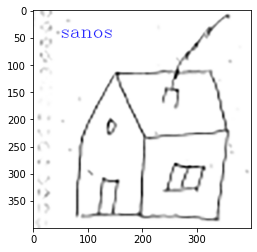

Image:no-sano3.png


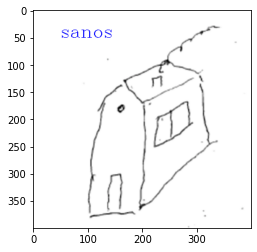

Image:sano2.png


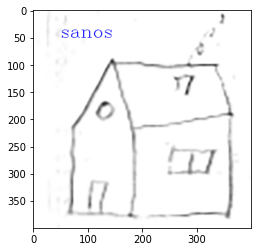

Image:sano3.png


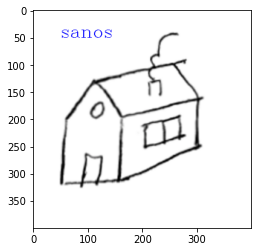

Image:no-sano2.png


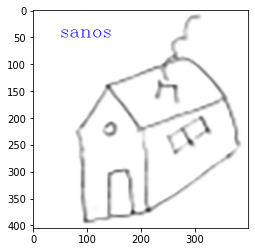

Image:no-sano1.png


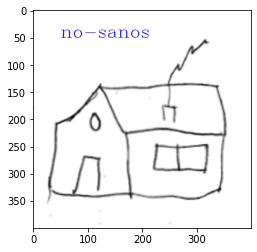

In [17]:
for image_test in testing_images:
  testing_image1 = cv2.imread('query/'+ image_test)
  id = findId(testing_image1, desList)
  image_text = "Image:" + image_test
  print(image_text)

  if id != -1:
    cv2.putText(testing_image1, classNames[id], (50,50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255),1)
    if classNames[id] == "sanos":      
      sanos_detected = sanos_detected + 1
    else:      
      no_sanos_detected = no_sanos_detected + 1  
    y_pred.append(classNames[id])  
  
  printImage(testing_image1)



In [18]:
print(' - # of testing images: ', total_testing)
print(' - # of sanos detected: ', sanos_detected)
print(' - # of no-sanos detected: ', no_sanos_detected)

 - # of testing images:  6
 - # of sanos detected:  5
 - # of no-sanos detected:  1


In [20]:
def GetPredictedCorrect(sanos_detected, no_sanos_detected, number_testing_correct = 3):  
  predicted_correct = 0
  if sanos_detected < number_testing_correct:
    predicted_correct = sanos_detected
  elif sanos_detected > number_testing_correct:  
    predicted_correct = number_testing_correct

  if no_sanos_detected < number_testing_correct:
    predicted_correct += no_sanos_detected
  elif no_sanos_detected > number_testing_correct:  
    predicted_correct += number_testing_correct

  return predicted_correct

 - Accuracy of the model:  0.6666666666666666


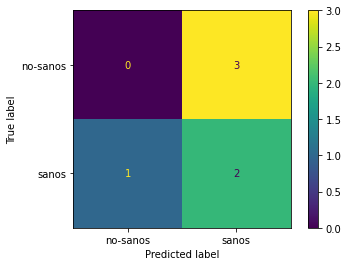

In [22]:
predicted_correct = GetPredictedCorrect(sanos_detected, no_sanos_detected)
accuracy = predicted_correct / total_testing
print(' - Accuracy of the model: ', accuracy)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay.from_predictions(y_true, y_pred)